# Regresja liniowa i wielomianowa

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

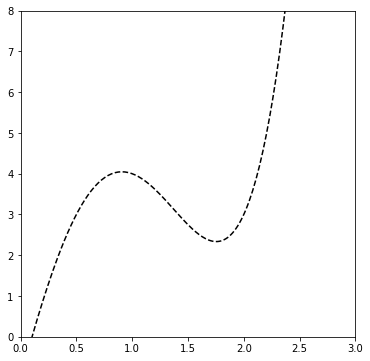

In [2]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)$.

Na ich podstawie będziemy wykonywać naszej presykcji.

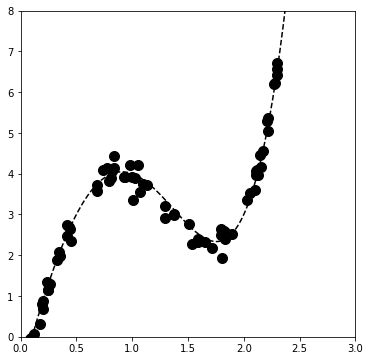

In [3]:
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.
My narazie urzyjemy metody opartej na rozwiązaniu układu równań liniowych.

In [4]:
x=np.vstack(x)
model1 = linear_model.LinearRegression()
model1.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
print(model1.coef_)
print(model1.intercept_)
print(model1.score(x,y))

[6.57556687]
-2.8780786481556966
0.5253089152633071


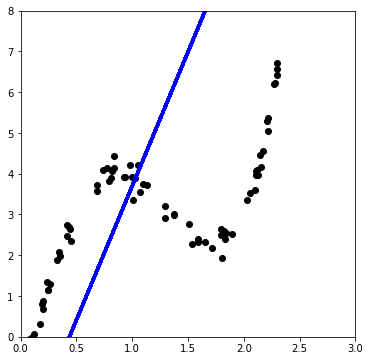

In [6]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x, model1.predict(x), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [8]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(x, y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

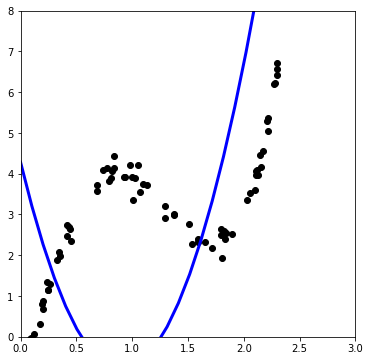

In [9]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model2.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

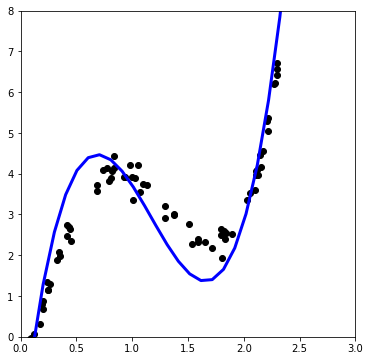

In [10]:
model3 = make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())
model3.fit(x, y)

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model3.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

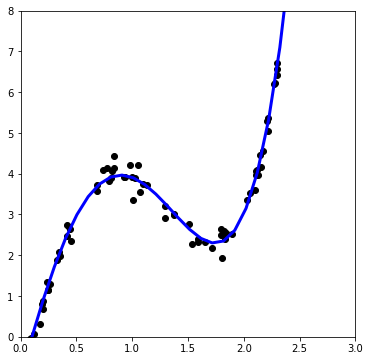

In [11]:
model4 = make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())
model4.fit(x, y)

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model4.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + a_5 \cdot x^5 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

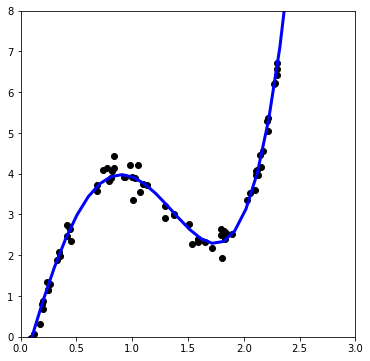

In [12]:
model5 = make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression())
model5.fit(x, y)

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model5.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Narysuj wszystkie wyniki na jednym wykresie.

## Która z krzywych jest najleprza?

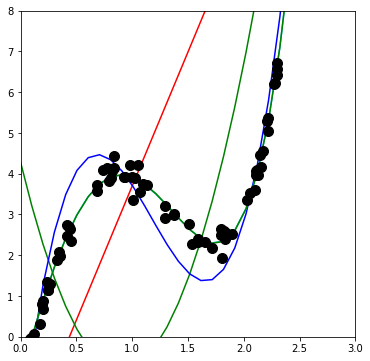

In [13]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_plot, model1.predict(x_plot), 'r');
plt.plot(x_plot, model2.predict(x_plot), 'g');
plt.plot(x_plot, model3.predict(x_plot), 'b');
plt.plot(x_plot, model4.predict(x_plot), 'c');
plt.plot(x_plot, model5.predict(x_plot), 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Musimy mieć jakąś miarę oceny.

In [15]:
from sklearn import  metrics

error1 = np.average( np.abs(model1.predict(x) -y) )
print("Mean absolute errors: {}".format(error1))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y, model1.predict(x))))

error2 = np.average( (model1.predict(x) -y) **2 )
print("Mean squared error: {}".format(error2))
print("Mean squared error: {}".format( metrics.mean_squared_error(y, model1.predict(x)) ))

error3 = np.median( np.abs(model1.predict(x) -y) )
print("Median absolute error: {}".format( error3 ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y, model1.predict(x)) ))

print("R^2: {}".format(metrics.r2_score(y, model1.predict(x))))
ss_res=np.sum( (y-model1.predict(x))**2 )
ss_tot=np.sum( (y-np.mean(y))**2 )
R=1-ss_res/ss_tot
print("R^2: {}".format(R))

error4 = 1-np.var(y - model1.predict(x) )/np.var(y)
print("Explained variance score: {}".format( error4 ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y, model1.predict(x)) ))


Mean absolute errors: 4.490645806591176
Mean absolute errors: 4.490645806591176
Mean squared error: 35.069025099929355
Mean squared error: 35.069025099929355
Median absolute error: 2.718908491336026
Median absolute error: 2.718908491336026
R^2: 0.5253089152633071
R^2: 0.5253089152633071
Explained variance score: 0.5253089152633073
Explained variance score: 0.5253089152633073


# Zadanie

Wylicz powyższe miary dla wszytkich modeli.

In [16]:
from sklearn import  metrics

def calculate_metrics(name, model):
    print(name)
    error1 = np.average( np.abs(model.predict(x) -y) )
    print("Mean absolute errors: {}".format(error1))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y, model.predict(x))))

    error2 = np.average( (model.predict(x) -y) **2 )
    print("Mean squared error: {}".format(error2))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y, model.predict(x)) ))

    error3 = np.median( np.abs(model.predict(x) -y) )
    print("Median absolute error: {}".format( error3 ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y, model.predict(x)) ))

    print("R^2: {}".format(metrics.r2_score(y, model.predict(x))))
    ss_res=np.sum( (y-model.predict(x))**2 )
    ss_tot=np.sum( (y-np.mean(y))**2 )
    R=1-ss_res/ss_tot
    print("R^2: {}".format(R))

    error4 = 1-np.var(y - model.predict(x) )/np.var(y)
    print("Explained variance score: {}".format( error4 ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y, model.predict(x)) ))


calculate_metrics("model1", model1)
calculate_metrics("model2", model2)
calculate_metrics("model3", model3)
calculate_metrics("model4", model4)
calculate_metrics("model5", model5)

model1
Mean absolute errors: 4.490645806591176
Mean absolute errors: 4.490645806591176
Mean squared error: 35.069025099929355
Mean squared error: 35.069025099929355
Median absolute error: 2.718908491336026
Median absolute error: 2.718908491336026
R^2: 0.5253089152633071
R^2: 0.5253089152633071
Explained variance score: 0.5253089152633073
Explained variance score: 0.5253089152633073
model2
Mean absolute errors: 3.3854248652202497
Mean absolute errors: 3.3854248652202497
Mean squared error: 15.59142783278454
Mean squared error: 15.59142783278454
Median absolute error: 3.8274362899775802
Median absolute error: 3.8274362899775802
R^2: 0.7889558728978392
R^2: 0.7889558728978392
Explained variance score: 0.7889558728978393
Explained variance score: 0.7889558728978393
model3
Mean absolute errors: 0.6622283787221943
Mean absolute errors: 0.6622283787221943
Mean squared error: 0.608740797242927
Mean squared error: 0.608740797242927
Median absolute error: 0.6445286952339213
Median absolute error